
## Fundamentals Of Machine Learning Final Assignment##
**Ana Aali Pour Mohammadi**

**Student Number:1828263**

Air quality is a crucial environmental indicator that affects the health and well-being of people and ecosystems worldwide. In recent years, machine learning (ML) has emerged as a powerful tool for predicting and classifying air quality data from various sources. In this project, I aim to gather air quality data and train ML models to accurately classify air quality levels based on different parameters. The primary goals of my project are to identify the best ML model for air quality classification, and to demonstrate how this technology can be used in City planning, Environmental regulation, Health and safety, and Education and awareness initiatives. By achieving these goals, my project will help advance our understanding of air quality and contribute to creating healthier and more sustainable communities.

I took help from the following libraries to do this project:
- pandas
- numpy
- requests
- datetime
- seaborn
- matplotlib
- scikit-learn

In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_theme(style="darkgrid")
sns.set_palette("Paired")

# Dataset Gathering

* `LATITUDE` and `LONGITUDE` represent the coordinates of a location in Minnesota (46.34936 N and -94.19837 W).
* `START_TIME` and `END_TIME` represent the start and end dates for a time period (January 1, 2020 to December 31, 2022).
* `START_TIME_TS` and `END_TIME_TS` represent the Unix timestamps for the start and end times, respectively.

In [3]:
# Minnesota
LATITUDE= 46.34936
LONGITUDE= -94.19837

START_TIME = '2020-01-01'
END_TIME = '2022-12-31'
START_TIME_TS = 1577836800
END_TIME_TS = 1672527600

## Air Quality API

I used the **OpenWeatherMap** API to collect historical air quality data for the state of Minnesota from January 1st, 2020 to December 31st, 2022. This API provides access to a variety of air quality data, such as the air quality index (AQI) and pollutant concentrations. The latitude and longitude coordinates for Minnesota were used to specify the location, and the start and end times were used to define the time period of interest. The resulting DataFrame contains the time and AQI data for each hour in the specified time period

In [4]:
KEY = 'f051cd3e8f12f6463f2291573f0aa169'

url = f"http://api.openweathermap.org/data/2.5/air_pollution/history?lat={LATITUDE}&lon={LONGITUDE}&start={START_TIME_TS}&end={END_TIME_TS}&appid={KEY}"

headers = {"Accept": "application/json"}
openWeather_response = requests.get(url, headers=headers)

json_openWeather = openWeather_response.json()
json_openWeather = json_openWeather['list']

ow_data = {
    'time': [],
    'aqi': []
    }

for i in json_openWeather:
    ow_data['time'].append(datetime.fromtimestamp(i['dt']).strftime("%Y-%m-%dT%H:00"))
    ow_data['aqi'].append(i['main']['aqi'])
    
df_air_quality = pd.DataFrame(ow_data)

In [6]:
df_air_quality.head()

,time,aqi
0,2020-11-25T04:00,1
1,2020-11-25T05:00,1
2,2020-11-25T06:00,1
3,2020-11-25T07:00,1
4,2020-11-25T08:00,1


In [7]:
df_air_quality.tail()

,time,aqi
18210,2022-12-31T22:00,1
18211,2022-12-31T23:00,1
18212,2023-01-01T00:00,1
18213,2023-01-01T01:00,1
18214,2023-01-01T02:00,1


In [8]:
df_air_quality.sample(5)

,time,aqi
4389,2021-05-28T02:00,2
12447,2022-04-30T20:00,2
12868,2022-05-18T09:00,1
7958,2021-10-23T18:00,1
17157,2022-11-15T01:00,1


In [9]:
df_air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18215 entries, 0 to 18214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    18215 non-null  object
 1   aqi     18215 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 284.7+ KB


In [10]:
df_air_quality.describe()


,aqi
count,18215.000000
mean,1.256766
std,0.504950
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,5.000000


 it seems that the air quality in the location where the AQI measurements were taken is generally good, with most of the AQI values falling at or below 1. However, there are some records where the AQI value is higher, with the maximum value being 5.

In [11]:
df_air_quality.to_csv("datasets/airQuality.csv", index=False)

## Weather API

I used **Open-Meteo** API to retrieve hourly weather data for a specific location. The request includes latitude and longitude coordinates, as well as start and end dates, which define the time period for which data is requested. The API is asked to return hourly values for various meteorological parameters such as temperature, relative humidity, dewpoint, rain, snowfall, and windspeed, as well as daily values for mean temperature, apparent temperature, precipitation, and other parameters. The timezone is also specified as Europe/London and the wind speed unit is set to meters per second. I selected the hourly response to gather my dataset to predict the air quality more precisely. 

The explanation of features:
* **temperature_2m**: the temperature at 2 meters above the ground

* **relativehumidity_2m**: the relative humidity at 2 meters above the ground

* **dewpoint_2m**: the dew point at 2 meters above the ground

* **rain**: the amount of rainfall in mm

* **snowfall**: the amount of snowfall in mm

* **windspeed_10m**: the wind speed at 10 meters above the ground



In [12]:
main_api = "https://archive-api.open-meteo.com/v1/archive"


url = f"{main_api}?latitude={LATITUDE}&longitude={LONGITUDE}&start_date={START_TIME}&end_date={END_TIME}&hourly=temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,windspeed_10m&models=best_match&daily=temperature_2m_mean,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours&timezone=Europe%2FLondon&windspeed_unit=ms"

headers = {"Accept": "application/json"}
meteo_response = requests.get(url, headers=headers)

json_res = meteo_response.json()
df_hourly_weather = pd.DataFrame(json_res['hourly'])

In [14]:
df_hourly_weather.head()

,time,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,windspeed_10m
0,2020-01-01T00:00,-9.0,81,-11.6,0.0,0.0,2.84
1,2020-01-01T01:00,-9.8,83,-12.1,0.0,0.0,2.96
2,2020-01-01T02:00,-10.5,84,-12.7,0.0,0.0,2.73
3,2020-01-01T03:00,-11.1,85,-13.1,0.0,0.0,2.69
4,2020-01-01T04:00,-11.5,85,-13.4,0.0,0.0,3.11


In [15]:
df_hourly_weather.tail()

,time,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,windspeed_10m
26299,2022-12-31T19:00,-5.4,81,-8.2,0.0,0.0,3.94
26300,2022-12-31T20:00,-3.0,82,-5.6,0.0,0.0,3.86
26301,2022-12-31T21:00,-1.9,82,-4.6,0.0,0.0,3.74
26302,2022-12-31T22:00,-1.4,84,-3.8,0.0,0.0,3.26
26303,2022-12-31T23:00,-1.1,86,-3.1,0.0,0.0,3.04


In [16]:
df_hourly_weather.sample(5)

,time,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,windspeed_10m
16008,2021-10-29T00:00,8.2,88,6.3,0.0,0.00,3.60
26067,2022-12-22T03:00,-21.0,75,-24.3,0.0,0.28,2.79
12294,2021-05-27T06:00,10.3,56,1.8,0.0,0.00,2.62
7891,2020-11-24T19:00,0.3,90,-1.2,0.0,0.07,4.16
22185,2022-07-13T09:00,17.4,93,16.3,0.0,0.00,2.28


In [17]:
df_hourly_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 26304 non-null  object 
 1   temperature_2m       26304 non-null  float64
 2   relativehumidity_2m  26304 non-null  int64  
 3   dewpoint_2m          26304 non-null  float64
 4   rain                 26304 non-null  float64
 5   snowfall             26304 non-null  float64
 6   windspeed_10m        26304 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.4+ MB


In [18]:
df_hourly_weather.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,windspeed_10m
count,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000
mean,6.592822,69.041781,0.818115,0.062363,0.010666,3.779063
std,13.534878,15.914595,12.316901,0.415649,0.073556,1.724292
min,-34.200000,19.000000,-37.300000,0.000000,0.000000,0.000000
25%,-2.900000,58.000000,-7.500000,0.000000,0.000000,2.480000
50%,6.600000,71.000000,0.700000,0.000000,0.000000,3.600000
75%,18.500000,82.000000,11.600000,0.000000,0.000000,4.880000
max,33.900000,100.000000,24.000000,13.200000,1.890000,12.640000


The mean temperature of 6.592822 degrees Celsius suggests that Minnesota has a relatively cool climate. The mean relative humidity of 69.041781% indicates that the air in the location is generally moist. The mean dew point of 0.818115 degrees Celsius suggests that there may be some condensation present in the air.
The average rainfall of 0.062363 millimeters and the average snowfall of 0.010666 millimeters suggest that Minnesota may receive low to moderate amounts of precipitation. The mean wind speed of 3.779063 meters per second indicates that there may be some mild to moderate wind in the area.

In [19]:
df_hourly_weather.to_csv("datasets/weather.csv", index=False)

## Traffic data

Thanks to Minnesota Department of Transportation - MnDOT (state.mn.us), I was able to discover an excellent traffic dataset that has been archived by year. This dataset could prove highly valuable for my machine learning project, as it could help me predict traffic patterns and traffic density.

[Minnesota Department of Transportation - MnDOT (state.mn.us)](https://www.dot.state.mn.us/index.html)

I compiled a comprehensive traffic dataset by concatenating the data from 2020 to 2022. However, in order to utilize hourly traffic density data, I need to restructure the dataset accordingly

In [20]:
traffic_data_2020 = pd.read_csv("datasets/traffic_vol_2020.csv")
traffic_data_2021 = pd.read_csv("datasets/traffic_vol_2021.csv")
traffic_data_2022 = pd.read_csv("datasets/traffic_vol_2022.csv")

In [21]:
traffic_data_2020.head()

,station_id,dir_of_travel,lane_of_travel,date,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,24
0,26,1,1,2020-01-01,55,63,43,40,35,57,...,487,458,466,372,330,272,209,153,114,86
1,26,1,2,2020-01-01,3,7,3,7,5,7,...,198,195,220,133,95,85,54,28,22,15
2,26,5,1,2020-01-01,59,54,39,52,45,63,...,469,430,434,361,312,229,190,145,70,49
3,26,5,2,2020-01-01,8,2,3,5,5,4,...,207,204,195,146,109,79,37,21,15,7
4,26,1,1,2020-01-02,66,49,62,71,131,209,...,460,465,424,392,312,218,196,192,159,102


In [22]:
traffic_data_2021.head()

,station_id,dir_of_travel,lane_of_travel,date,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,24
0,26,1,1,1/1/2021,88,75,50,50,62,55,...,354,304,331,320,245,200,188,138,136,86
1,26,1,2,1/1/2021,9,11,7,3,9,3,...,105,112,116,95,72,55,51,31,25,18
2,26,5,1,1/1/2021,58,39,46,28,50,68,...,373,361,296,270,217,169,145,108,94,66
3,26,5,2,1/1/2021,8,2,4,1,7,7,...,118,139,102,66,61,41,41,17,9,4
4,26,1,1,1/2/2021,67,42,43,51,59,86,...,483,551,498,446,370,320,254,200,155,120


In [23]:
traffic_data_2022.head()

,station_id,dir_of_travel,lane_of_travel,date,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,24
0,26,1,1,2022-01-01,71,77,63,60,52,52,...,319,269,300,243,239,175,138,138,119,89
1,26,1,2,2022-01-01,9,9,6,12,4,4,...,100,61,94,59,59,35,38,31,15,12
2,26,5,1,2022-01-01,57,51,33,26,39,62,...,351,323,302,249,227,179,134,119,123,79
3,26,5,2,2022-01-01,7,10,4,6,6,8,...,111,92,92,68,58,38,24,18,16,13
4,26,1,1,2022-01-02,71,56,34,41,48,67,...,643,646,596,548,419,350,272,202,140,111


In [24]:
traffic_df = pd.concat([traffic_data_2020, traffic_data_2021, traffic_data_2022])

In [25]:
traffic_df.sample(5)

,station_id,dir_of_travel,lane_of_travel,date,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,24
9924,43,3,1,2/17/2021,26,17,13,24,34,78,...,371,437,526,623,337,234,169,124,69,45
151966,11202,3,2,2022-03-10,53,38,38,49,97,321,...,1640,1800,1637,1652,1251,717,648,477,304,173
47388,309,1,3,2022-11-15,10,4,4,4,19,99,...,344,461,606,539,210,132,115,92,56,22
124977,11273,1,4,11/8/2021,14,2,0,0,43,145,...,673,679,765,566,221,162,130,83,10,13
70534,3467,3,1,2/23/2021,48,32,24,22,28,34,...,222,274,314,366,327,215,165,124,99,79


I am dropping certain columns from a Pandas DataFrame named traffic_df using the drop() method. Specifically, I am dropping the columns `station_id`, `dir_of_travel`, and `lane_of_travel`. To do so, I have specified axis=1 to drop the columns along the columns axis and inplace=True to perform the operation on the DataFrame traffic_df itself, as opposed to creating a new DataFrame with the dropped columns.

In [26]:
traffic_df.drop(['station_id', 
                 'dir_of_travel', 
                 'lane_of_travel'], 
                 axis=1, inplace=True)

In [27]:
# changing date column to datetime
traffic_df['date'] = pd.to_datetime(traffic_df.date)

In [28]:
traffic_df.head(5)

,date,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,2020-01-01,55,63,43,40,35,57,65,78,140,...,487,458,466,372,330,272,209,153,114,86
1,2020-01-01,3,7,3,7,5,7,5,8,14,...,198,195,220,133,95,85,54,28,22,15
2,2020-01-01,59,54,39,52,45,63,139,179,268,...,469,430,434,361,312,229,190,145,70,49
3,2020-01-01,8,2,3,5,5,4,22,37,60,...,207,204,195,146,109,79,37,21,15,7
4,2020-01-02,66,49,62,71,131,209,256,315,315,...,460,465,424,392,312,218,196,192,159,102


In [29]:
# Rename 0 column name that represent 12 am to 24
traffic_df = traffic_df.rename(columns={'24': '0'}) 

In [30]:
# Group the dataset by the date column and aggregate values by summation
traffic_df = traffic_df.groupby(by="date").agg(np.sum)

In [31]:
traffic_df.reset_index(inplace=True)

I used the `melt()` function in Pandas to reshape my traffic dataset. By specifying the id_vars parameter as date, the hour and traffic_density columns were created by melting the columns that were not specified.

In [32]:
traffic_df = traffic_df.melt(id_vars=['date'], var_name='hour', value_name='traffic_density')
traffic_df

,date,hour,traffic_density
0,2020-01-01,1,63070
1,2020-01-02,1,29100
2,2020-01-03,1,33363
3,2020-01-04,1,48133
4,2020-01-05,1,45792
...,...,...,...
25555,2022-12-27,0,56696
25556,2022-12-28,0,60708
25557,2022-12-29,0,64717
25558,2022-12-30,0,79761


In [33]:
# Changing the datetime format
traffic_df['time'] = pd.to_datetime(traffic_df['date'].dt.date.astype(str) + ' ' + traffic_df['hour'] + ':00')
traffic_df['time'] = traffic_df['time'].dt.strftime('%Y-%m-%dT%H:00')

In [34]:
# Dropping unnecessary columns
traffic_df.drop(['date', 'hour'], axis=1, inplace=True)
traffic_df

,traffic_density,time
0,63070,2020-01-01T01:00
1,29100,2020-01-02T01:00
2,33363,2020-01-03T01:00
3,48133,2020-01-04T01:00
4,45792,2020-01-05T01:00
...,...,...
25555,56696,2022-12-27T00:00
25556,60708,2022-12-28T00:00
25557,64717,2022-12-29T00:00
25558,79761,2022-12-30T00:00


In [35]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25560 entries, 0 to 25559
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   traffic_density  25560 non-null  int64 
 1   time             25560 non-null  object
dtypes: int64(1), object(1)
memory usage: 399.5+ KB


In [36]:
traffic_df.describe()

,traffic_density
count,25560.000000
mean,152043.335798
std,112083.429562
min,0.000000
25%,44765.500000
50%,132280.000000
75%,250285.750000
max,450134.000000


The mean traffic density of 152,043.34 vehicles suggests that Minnesota may have moderate to high levels of traffic overall. The standard deviation of 112,083.43 indicates that there is significant variability in the data, which suggests that some areas of Minnesota may have significantly higher or lower traffic densities than others.
The minimum value of 0 suggests that there may be periods of time where there is little or no traffic in the area, which could be due to a variety of factors such as time of day, day of the week, or specific events or weather conditions. The maximum value of 450,134 indicates that there may be periods of time where there is a high volume of traffic in the area, which could be due to factors such as rush hour, accidents, or road construction.
The quartile values of 44,765.5 (25th percentile) and 250,285.75 (75th percentile) suggest that the majority of the recorded traffic densities are distributed between these two values.

## Joining the datasets

I merged the `df_hourly_weather`, `traffic_df`, and `df_air_quality` dataframes into a new dataframe named df, using the `merge()` function with the on parameter set to `time`. The result is a dataframe includes 9 columns and 17468 rows

In [37]:
df = df_hourly_weather.merge(traffic_df, on='time')
df = df.merge(df_air_quality, on='time')

In [38]:
df.sample(10)

,time,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,windspeed_10m,traffic_density,aqi
16736,2022-11-28T12:00,-2.4,76,-6.1,0.0,0.0,4.96,273517,1
8191,2021-11-02T11:00,-0.6,77,-4.1,0.0,0.0,3.18,232497,1
15161,2022-09-23T21:00,13.9,68,8.2,0.2,0.0,7.84,185027,1
10365,2022-03-06T01:00,-1.2,81,-4.0,0.1,0.0,3.93,35755,1
3630,2021-04-26T11:00,2.2,89,0.5,0.3,0.0,5.28,77863,2
4806,2021-06-14T11:00,17.1,66,10.6,0.0,0.0,3.08,243604,1
8677,2021-11-22T17:00,-6.9,59,-13.7,0.0,0.0,1.63,354351,1
4869,2021-06-17T02:00,28.4,39,13.3,0.0,0.0,2.57,23351,2
14110,2022-08-11T03:00,21.9,54,12.3,0.0,0.0,2.95,19956,1
14265,2022-08-17T14:00,19.4,84,16.6,0.0,0.0,3.36,270954,1


In [39]:
df.shape

(17468, 9)

In [40]:
df.to_csv("datasets/combined.csv", index=False)

# Data Cleaning

In [41]:
df = pd.read_csv("datasets/combined.csv")
df.shape

(17468, 9)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17468 entries, 0 to 17467
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 17468 non-null  object 
 1   temperature_2m       17468 non-null  float64
 2   relativehumidity_2m  17468 non-null  int64  
 3   dewpoint_2m          17468 non-null  float64
 4   rain                 17468 non-null  float64
 5   snowfall             17468 non-null  float64
 6   windspeed_10m        17468 non-null  float64
 7   traffic_density      17468 non-null  int64  
 8   aqi                  17468 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 1.2+ MB


In [43]:
df.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,windspeed_10m,traffic_density,aqi
count,17468.000000,17468.000000,17468.000000,17468.000000,17468.000000,17468.000000,17468.000000,17468.000000
mean,6.649599,68.911037,0.842466,0.067581,0.010251,3.792768,161434.111575,1.263854
std,13.784137,16.043655,12.602002,0.421215,0.070857,1.722387,118563.349685,0.510994
min,-34.200000,19.000000,-37.300000,0.000000,0.000000,0.100000,0.000000,1.000000
25%,-2.700000,57.000000,-7.300000,0.000000,0.000000,2.510000,46789.000000,1.000000
50%,7.000000,70.000000,1.000000,0.000000,0.000000,3.590000,138043.000000,1.000000
75%,18.600000,81.000000,11.700000,0.000000,0.000000,4.880000,270651.500000,1.000000
max,33.900000,100.000000,23.700000,9.900000,1.820000,12.640000,450134.000000,5.000000


we can see that the location experienced an average temperature of 6.65°C, with a minimum of -34.2°C and a maximum of 33.9°C. The average relative humidity was 68.91%, and the dew point was 0.84°C on average. The location also experienced an average rainfall of 0.067 mm and an average snowfall of 0.01 mm, indicating that the area may have a mild climate.
The dataset also includes information on traffic density and air quality index (AQI). The mean traffic density was 161,434 vehicles, with a minimum of 0 and a maximum of 450,134. The mean AQI was 1.26, with a minimum of 1 and a maximum of 5, indicating that the air quality in this location is generally good.

converting time column to datetime format

In [44]:
df['time'] = pd.to_datetime(df['time'])

converting datetime to season, month, day

In [45]:
# Extracting quarter, month, and weekday of datetime and adding them to dataframe
df['quarter'] = df['time'].dt.quarter
df['month'] = df['time'].dt.month
df['weekday'] = df['time'].dt.weekday

I converted the quarter, month, and weekday columns to categorical data type using the .astype() method. This can be useful for memory optimization and to indicate that these columns should not be treated as continuous variables, but rather as categorical features.

In [46]:
# Changing the type of date columns to category because the functions assume they are int
df['quarter'] = df['quarter'].astype('category')
df['month'] = df['month'].astype('category')
df['weekday'] = df['weekday'].astype('category')

In [47]:
df.sample(5)

,time,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,windspeed_10m,traffic_density,aqi,quarter,month,weekday
5071,2021-06-25 12:00:00,16.8,82,13.6,0.0,0.0,1.70,307482,1,2,6,4
2854,2021-03-25 03:00:00,2.3,85,0.0,0.0,0.0,2.02,12279,1,1,3,3
6636,2021-08-29 17:00:00,20.8,67,14.5,0.0,0.0,5.04,284056,1,3,8,6
548,2020-12-18 00:00:00,-2.9,74,-6.9,0.0,0.0,3.35,47714,2,4,12,4
8941,2022-01-03 17:00:00,-11.0,79,-13.9,0.0,0.0,2.59,299403,1,1,1,0


In [48]:
df.drop(['time'], axis=1, inplace=True)

In [49]:
# Select weather columns
weather_cols = ['temperature_2m', 
                'relativehumidity_2m',
                'dewpoint_2m',
                'windspeed_10m']

## Removing the outliers

<AxesSubplot:>

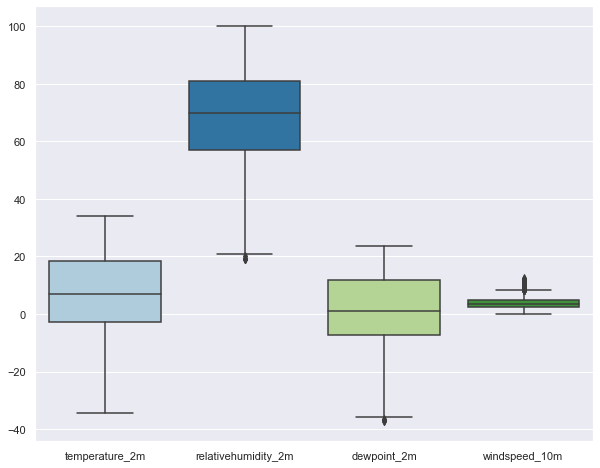

In [50]:
sns.boxplot(data=df[weather_cols])

In [51]:
# Removing the outliers
df_clean = df[(df['relativehumidity_2m'] > 30)]
df_clean = df_clean[(df_clean['dewpoint_2m'] > -30)]

<AxesSubplot:>

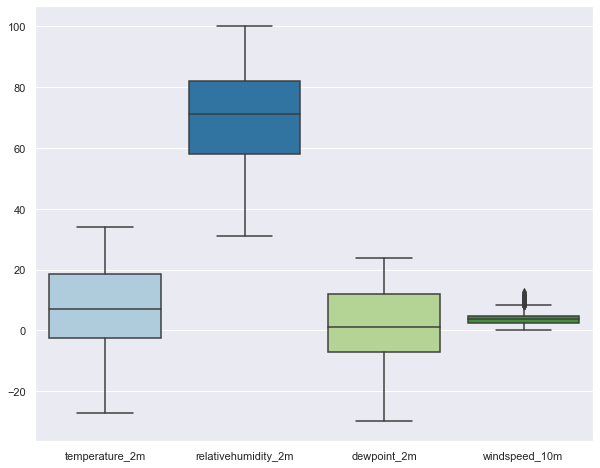

In [52]:
sns.boxplot(data=df_clean[weather_cols])

<AxesSubplot:>

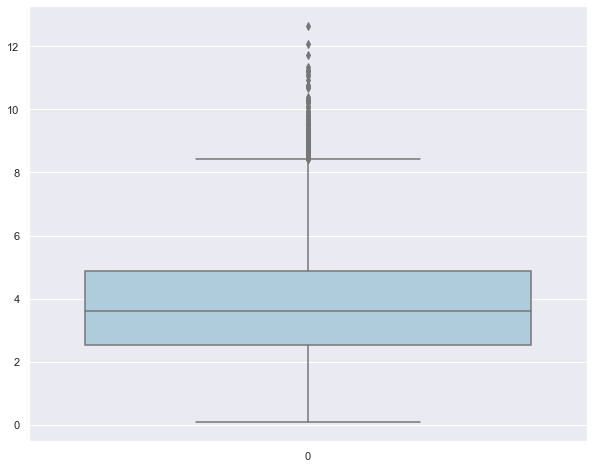

In [53]:
sns.boxplot(data=df_clean['windspeed_10m'])


In [54]:
# Removing the outliers
df_clean = df_clean[(df_clean['windspeed_10m'] < 8)]

<AxesSubplot:>

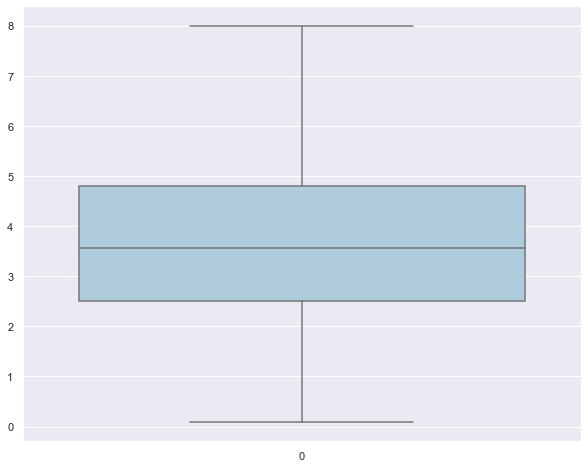

In [55]:
sns.boxplot(data=df_clean['windspeed_10m'])

<AxesSubplot:>

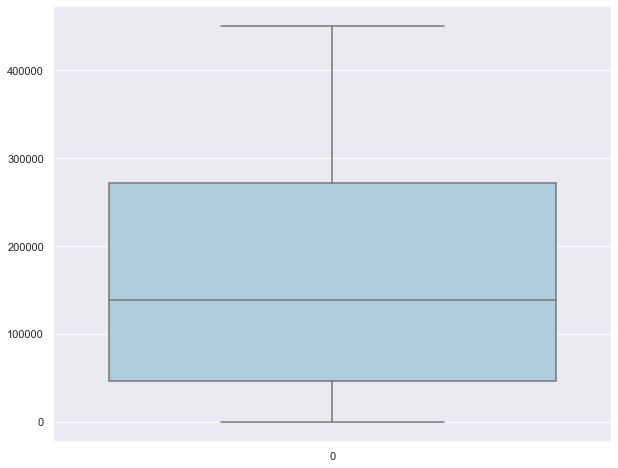

In [56]:
sns.boxplot(data=df_clean['traffic_density'])

# Exploratory Data Analysis

In this section, I am looking to examine the different features of the dataset and I want to examine what relationships there can be between these values. Also, to be more precise about the changes in the values of the air quality status, how it changes and how to make decisions based on data from those results.

In [57]:
aqi_count = df_clean['aqi'].value_counts()

In [58]:
aqi_count

1    12844
2     3877
3      107
4       67
5       46
Name: aqi, dtype: int64

This imbalance in the distribution of data points across different AQI levels is a problem for machine learning algorithms, as it can bias the model towards the majority class and lead to poor performance in predicting minority classes. In other words, the algorithm will be better at predicting the most common AQI levels, while performing poorly on the less frequent levels.

Text(0, 0.5, 'Count')

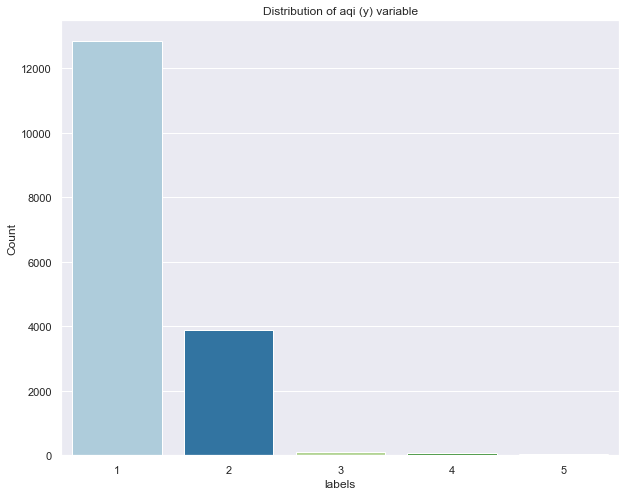

In [59]:
sns.barplot(x=aqi_count.index, y=aqi_count)
plt.title("Distribution of aqi (y) variable")
plt.xlabel("labels")
plt.ylabel("Count")

In [60]:
df_clean.corr()

,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,windspeed_10m,traffic_density,aqi
temperature_2m,1.000000,-0.270324,0.960246,0.094749,-0.123433,-0.043742,0.157817,0.089518
relativehumidity_2m,-0.270324,1.000000,0.004717,0.184083,0.141676,-0.112922,0.072638,-0.132904
dewpoint_2m,0.960246,0.004717,1.000000,0.149830,-0.093645,-0.074598,0.189121,0.050695
rain,0.094749,0.184083,0.149830,1.000000,-0.007452,0.054674,-0.005727,0.011376
snowfall,-0.123433,0.141676,-0.093645,-0.007452,1.000000,0.093475,-0.023513,-0.022306
windspeed_10m,-0.043742,-0.112922,-0.074598,0.054674,0.093475,1.000000,0.022622,0.107523
traffic_density,0.157817,0.072638,0.189121,-0.005727,-0.023513,0.022622,1.000000,-0.149255
aqi,0.089518,-0.132904,0.050695,0.011376,-0.022306,0.107523,-0.149255,1.000000


Text(0.5, 1.0, 'Correlation Matrix of our dataset')

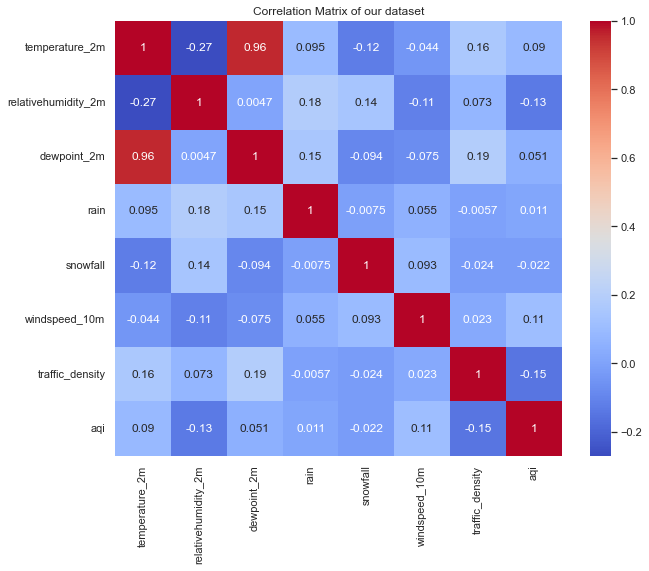

In [61]:
df_corr = df_clean.corr()
# create a heatmap of the correlation matrix
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix of our dataset')

## Interpretation of the matrix:

* `Temperature_2m` is **highly correlated** with `dewpoint_2m` (0.96) and **moderately correlated** with `traffic_density` (0.15) and `aqi` (0.09).
* `Relativehumidity_2m` is **moderately negatively correlated** with `traffic_density` (-0.07) and `aqi` (-0.13).
* `Dewpoint_2m` is **highly correlated** with `temperature_2m` (0.96) and **moderately correlated** with `traffic_density` (0.19).
* `Rain` is **weakly positively correlated** with all variables in the dataset.
* `Snowfall` is **weakly negatively correlated** with `traffic_density` (-0.02) and `aqi` (-0.02).
* `Windspeed_10m` is **weakly positively correlated** with `traffic_density` (0.02) and `aqi` (0.11).
* `Traffic_density` is **weakly positively correlated** with temperature_2m (0.15) and dewpoint_2m (0.19) and weakly negatively correlated with aqi (-0.15).
* AQI is **weakly positively correlated** with `windspeed_10m` (0.11) and **weakly negatively correlated** with `relativehumidity_2m` (-0.13) and `traffic_density` (-0.15).


- The **high correlation** between `temperature_2m` and `dewpoint_2m` is expected since `dewpoint` is directly related to the air temperature. The **moderate correlation** between `temperature_2m` and `traffic_density` might indicate that the traffic density tends to be higher when the temperature is higher. On the other hand, the negative correlation between `relativehumidity_2m` and traffic_density might indicate that the traffic density tends to be lower when the humidity is higher.

* Quarter

In [62]:
df_by_quarter = df_clean.groupby(by='quarter').agg(np.mean)

In [63]:
df_by_quarter

,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,windspeed_10m,traffic_density,aqi
quarter,,,,,,,,
1,-7.405153,73.383442,-11.592671,0.013182,0.020188,3.834532,110151.295398,1.341171
2,12.538817,64.510968,5.428183,0.098617,0.004907,3.852344,172802.869099,1.350501
3,20.606072,66.817387,13.740202,0.112259,0.000000,3.416640,190045.348206,1.247930
4,1.208430,72.559873,-3.427312,0.043558,0.014824,3.827666,171443.047489,1.128153


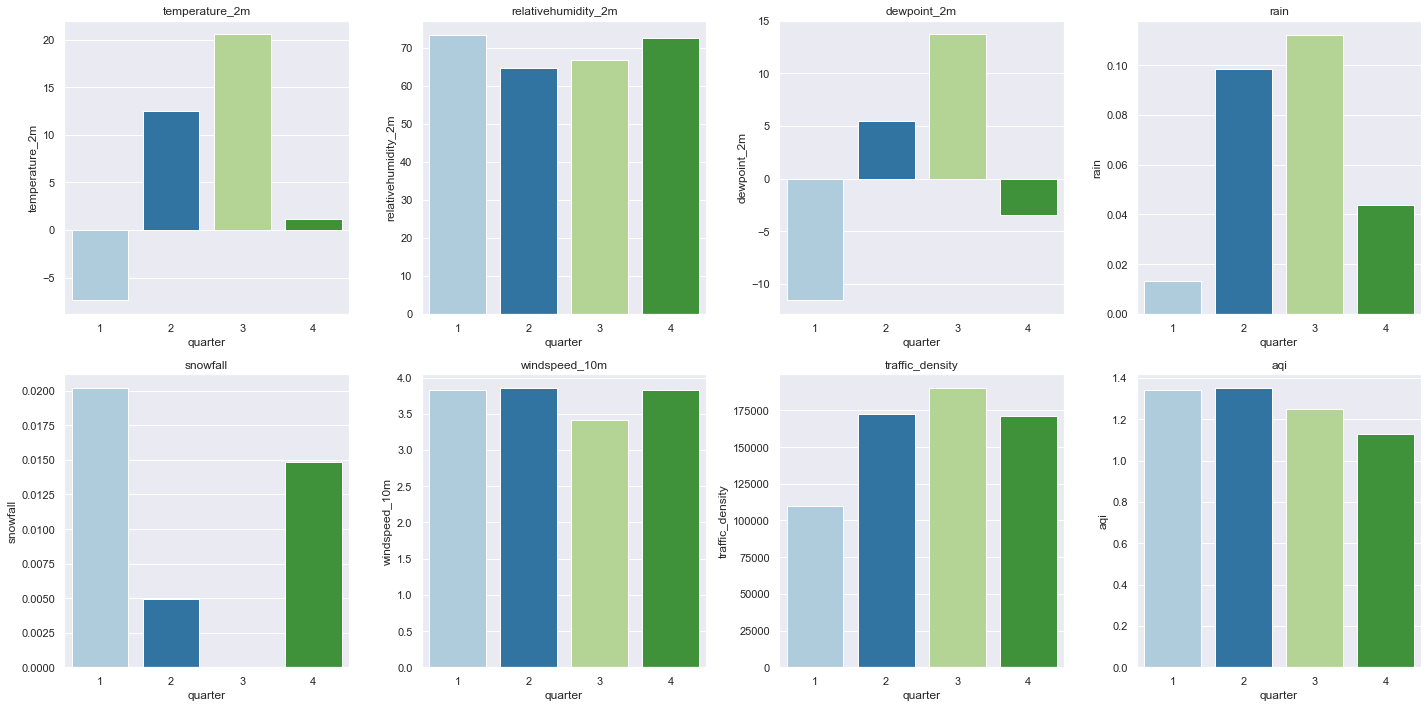

In [64]:
# create a figure with subplots for each column
fig, axs = plt.subplots(ncols=len(df_by_quarter.columns)//2, 
                        nrows=2,
                        figsize=(20, 10))

# loop over each column and create a barplot
for i, col in enumerate(df_by_quarter.columns):
    row = i // (len(df_by_quarter.columns)//2)
    col_i = i % (len(df_by_quarter.columns)//2)

    sns.barplot(x=df_by_quarter.index, 
                y=col, 
                data=df_by_quarter, 
                ax=axs[row, col_i])
    axs[row, col_i].set_title(col)

# adjust the layout of the subplots
plt.tight_layout()


As we can see that the highest temperatures, relative humidity, and dew point occur in Q3, which is the summer season. The highest amounts of rain and snowfall occur in Q2, which is the monsoon season. The highest wind speeds occur in Q1, which is the winter season. The highest traffic density occurs in Q3 as well, which is consistent with increased tourism and travel during the summer season. The highest air pollution levels, as indicated by the air quality index, occur in Q2 and Q3, which is likely due to increased industrial and vehicular activity during these seasons.

* Month

In [65]:
df_by_month = df_clean.groupby(by='month').agg(np.mean)

In [66]:
df_by_month

,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,windspeed_10m,traffic_density,aqi
month,,,,,,,,
1,-10.148035,79.465793,-13.064774,0.000582,0.018392,3.625444,89206.072780,1.125910
2,-12.253486,73.030612,-16.196088,0.001701,0.024464,3.760136,114639.529762,1.253401
3,-0.864848,67.898481,-6.457113,0.034461,0.018419,4.093356,126380.972376,1.616713
4,3.749321,69.087205,-1.885490,0.120443,0.014711,4.282473,125427.774839,1.523231
5,13.008875,64.823899,6.054577,0.111600,0.000000,3.742418,194738.518519,1.323550
6,21.060704,59.489003,12.272361,0.062610,0.000000,3.526503,198380.466276,1.201613
7,22.681036,65.726382,15.438558,0.103359,0.000000,3.100700,194722.039888,1.319104
8,21.611694,67.836022,14.903965,0.105511,0.000000,3.491310,185455.918683,1.202285
9,17.488330,66.847659,10.834102,0.128162,0.000000,3.654493,190147.429769,1.224319


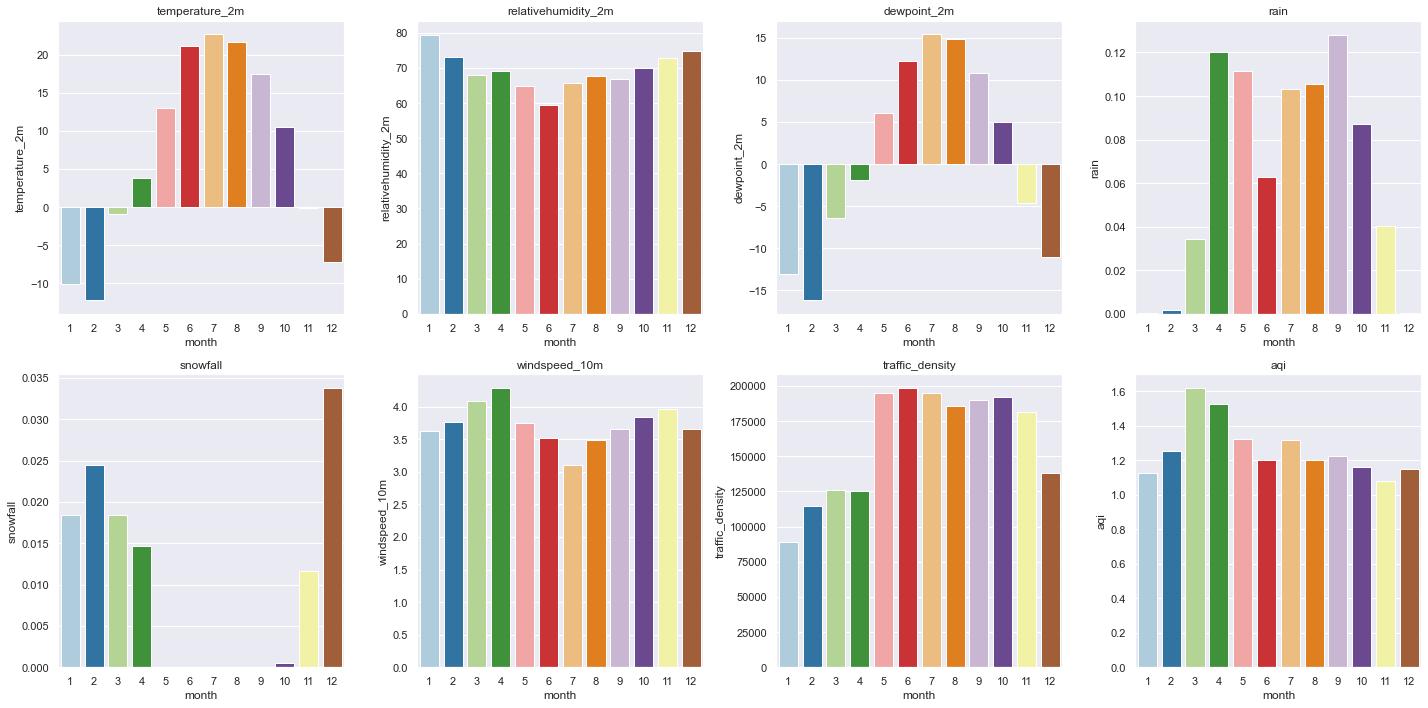

In [67]:
# create a figure with subplots for each column
fig, axs = plt.subplots(ncols=len(df_by_month.columns)//2, 
                        nrows=2,
                        figsize=(20, 10))

# loop over each column and create a barplot
for i, col in enumerate(df_by_month.columns):
    row = i // (len(df_by_month.columns)//2)
    col_i = i % (len(df_by_month.columns)//2)

    sns.barplot(x=df_by_month.index, 
                y=col, 
                data=df_by_month, 
                ax=axs[row, col_i])
    axs[row, col_i].set_title(col)

# adjust the layout of the subplots
plt.tight_layout()


 The rain and snowfall variables show that it rains a lot in the area, especially in the spring and fall months. The traffic_density variable could be an indication of urbanization or population density in the area. Finally, the air quality index suggests that the air quality in the area is generally good, with some fluctuations throughout the year.

* Weekday
  

In [68]:
df_by_weekday = df_clean.groupby(by='weekday').agg(np.mean)

In [69]:
df_by_weekday

,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,windspeed_10m,traffic_density,aqi
weekday,,,,,,,,
0,6.907137,69.033828,1.159530,0.059860,0.009328,3.612607,161565.206683,1.275990
1,7.068336,68.231422,1.160905,0.058926,0.010319,3.716971,168245.966882,1.259289
2,7.284552,70.482032,1.785750,0.058653,0.018967,3.773337,169358.779017,1.251136
3,6.520357,70.044362,0.958665,0.082172,0.014859,3.840788,170131.090381,1.269071
4,6.609211,68.842214,0.828872,0.076828,0.005580,3.775489,178504.154069,1.249484
5,6.565041,69.455738,0.902131,0.073525,0.003299,3.684246,153383.029508,1.257377
6,7.783894,68.939923,1.938006,0.063698,0.006412,3.706378,132492.594802,1.288027


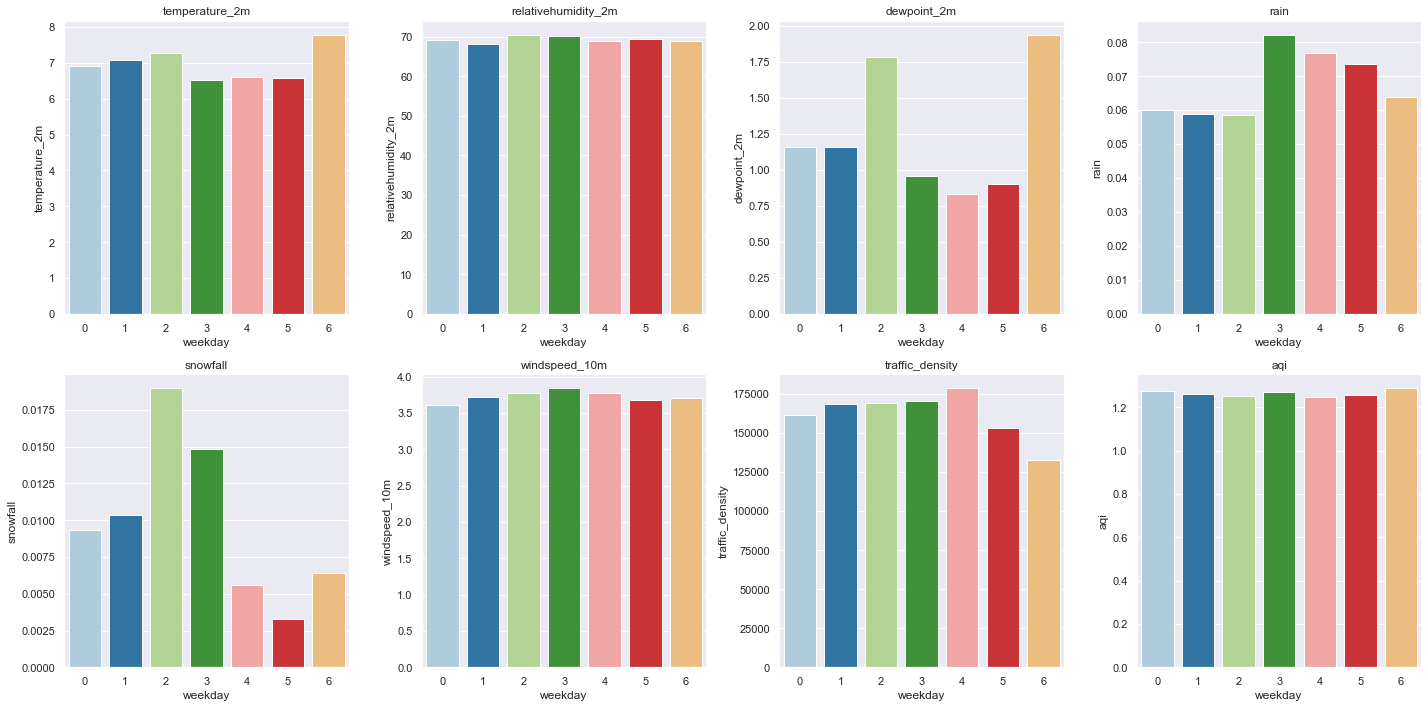

In [70]:
# create a figure with subplots for each column
fig, axs = plt.subplots(ncols=len(df_by_weekday.columns)//2, 
                        nrows=2,
                        figsize=(20, 10))

# loop over each column and create a barplot
for i, col in enumerate(df_by_weekday.columns):
    row = i // (len(df_by_weekday.columns)//2)
    col_i = i % (len(df_by_weekday.columns)//2)

    sns.barplot(x=df_by_weekday.index, 
                y=col, 
                data=df_by_weekday, 
                ax=axs[row, col_i])
    axs[row, col_i].set_title(col)

# adjust the layout of the subplots
plt.tight_layout()


The air quality is relatively good for all days of the week, with AQI values mostly between 1.25 and 1.29. The traffic density also seems to be fairly consistent across the days. The weather data varies from day to day, with different levels of temperature, humidity, and precipitation.

# Preprocessing data

In [71]:
X = df_clean.drop(['aqi'], axis=1)
y = df_clean['aqi']

In [72]:
X.sample(5)

,temperature_2m,relativehumidity_2m,dewpoint_2m,rain,snowfall,windspeed_10m,traffic_density,quarter,month,weekday
4150,19.5,53,9.8,0.0,0.0,3.18,18276,2,5,1
656,-6.1,86,-8.1,0.0,0.0,2.52,56867,4,12,1
4328,18.3,85,15.7,0.0,0.0,4.87,267194,2,5,1
9359,-21.9,75,-25.2,0.0,0.0,3.14,16412,1,1,4
12150,9.8,84,7.3,0.0,0.0,2.14,270302,2,5,3


In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
X_train.shape

(13552, 10)

In [75]:
X_test.shape

(3389, 10)

Scaling the data can be important when working with certain machine learning models, as many models are sensitive to the scale of the input features. Feature scaling ensures that all features are on a similar scale and have a similar influence on the model. My dataset contains various environmental measurements, such as temperature, humidity, and wind speed, as well as some other variables like traffic density and air quality index (AQI). The scaling process will ensure that these variables are all on a similar scale, making them easier to compare and analyze together.

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
X_train_scaled

array([[ 1.17314788, -0.14152855,  1.22026019, ...,  0.4142791 ,
         0.1120614 , -1.49123379],
       [-0.70093476,  0.04856642, -0.68277579, ..., -1.38431464,
        -1.3473429 ,  0.51823229],
       [ 1.24034607, -1.66228834,  0.73020801, ...,  0.4142791 ,
         0.40394226, -0.98886727],
       ...,
       [ 0.96408687,  0.2386614 ,  1.11408221, ...,  0.4142791 ,
         0.1120614 , -1.49123379],
       [-1.2011879 ,  0.9356763 , -1.01764478, ...,  1.31357597,
         1.5714657 ,  0.01586577],
       [-0.14094991,  1.82278617,  0.28916104, ...,  1.31357597,
         1.27958484,  0.01586577]])

In [78]:
y_train.sample(6)

17348    1
9465     1
8083     1
15175    1
16452    1
7227     1
Name: aqi, dtype: int64

In [79]:
y_train.value_counts()

1    10257
2     3110
3       90
4       52
5       43
Name: aqi, dtype: int64

In [80]:
y_test.value_counts()

1    2587
2     767
3      17
4      15
5       3
Name: aqi, dtype: int64

# Models

In [101]:
# Importing the classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold, cross_validate

# Evaluation metrics
from sklearn.metrics import confusion_matrix

Through my research, I gained insight into the importance of metrics such as **accuracy, precision, recall, and F1 score** in assessing the effectiveness of classification models. These definitions are my personal impression :

* Accuracy: This metric measures the overall correctness of the model's predictions by calculating the proportion of correctly classified instances out of the total number of instances. It's a commonly used metric but can be misleading if the dataset is imbalanced.
* Precision: This metric calculates the proportion of true positives (correctly identified positives) out of all the positive predictions made. Precision tells us how confident we can be that the positive predictions are actually correct.
* Recall: This metric calculates the proportion of true positives out of all the actual positives in the dataset. Recall tells us how well the model can identify positive instances.
* F1 score: This is the harmonic mean of precision and recall, which balances the two metrics. The F1 score is a useful metric to consider when both precision and recall are important, and we want to find a balance between them. The F1 score is calculated as 2 * (precision * recall) / (precision + recall).

I created a k-fold cross-validation object with 5 splits and set shuffle to True and random_state to 42. Then, I looped through the models dictionary, and for each model, I used the cross_val_score function to fit and score the model using the k-fold cross-validation object. I printed out the mean and standard deviation of the scores for each model, and appended the model name to the name_list and the mean score to the score_list.

In [82]:
# create a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Create a k-fold cross-validation object
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [103]:
scoring = ('accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted')

In [105]:
for name, model in models.items():
    scores = cross_validate(model, X_scaled, y, cv=kf, scoring=scoring)
    print(name)
    print("-->")
    print(f"accuracy --> {scores['test_accuracy'].mean()}")
    print(f"precision_weighted --> {scores['test_precision_weighted'].mean()}")
    print(f"recall_weighted --> {scores['test_recall_weighted'].mean()}")
    print(f"f1_weighted --> {scores['test_f1_weighted'].mean()}")

    print(20*"*")



Logistic Regression
-->
accuracy --> 0.7770494024873166
precision_weighted --> 0.7431242223546124
recall_weighted --> 0.7770494024873166
f1_weighted --> 0.7226319527132729
********************
Decision Tree
-->
accuracy --> 0.8276368645973518
precision_weighted --> 0.8285347775356614
recall_weighted --> 0.8276368645973518
f1_weighted --> 0.8279641840157304
********************
Random Forest
-->
accuracy --> 0.8857798495932565
precision_weighted --> 0.8809309385790757
recall_weighted --> 0.8857798495932565
f1_weighted --> 0.8781802985675442
********************
SVM
-->
accuracy --> 0.8034346310359617
precision_weighted --> 0.7791678437266024
recall_weighted --> 0.8034346310359617
f1_weighted --> 0.7718846651288664
********************
Naive Bayes
-->
accuracy --> 0.18405024520263663
precision_weighted --> 0.7326545780141218
recall_weighted --> 0.18405024520263663
f1_weighted --> 0.28597921896683354
********************
KNN
-->
accuracy --> 0.8591575877648465
precision_weighted --> 0.849

In [106]:
for name, model in models.items():
    ml_obj = model
    ml_obj.fit(X_train_scaled, y_train)
    
    y_pred = ml_obj.predict(X_test_scaled)

    print(3*"**********")
    print(name)
    print(confusion_matrix(y_test, y_pred))
    

******************************
Logistic Regression
[[2511   76    0    0    0]
 [ 621  146    0    0    0]
 [  17    0    0    0    0]
 [  15    0    0    0    0]
 [   3    0    0    0    0]]
******************************
Decision Tree
[[2319  242    7    5   14]
 [ 260  489   15    3    0]
 [   6    5    5    1    0]
 [   4    1    5    5    0]
 [   2    1    0    0    0]]
******************************
Random Forest
[[2493   93    0    0    1]
 [ 249  518    0    0    0]
 [   7   10    0    0    0]
 [   8    2    3    2    0]
 [   3    0    0    0    0]]
******************************
SVM
[[2485  102    0    0    0]
 [ 482  285    0    0    0]
 [  15    2    0    0    0]
 [  14    1    0    0    0]
 [   3    0    0    0    0]]
******************************
Naive Bayes
[[ 511  124    0 1766  186]
 [ 107  112    0  503   45]
 [   0    0    0   15    2]
 [   0    0    0   13    2]
 [   0    0    0    0    3]]
******************************
KNN
[[2446  137    1    1    2]
 [ 266  499  

Based on the results, the best model seems to be Random Forest, with an **accuracy of 0.886** and a weighted **f1-score of 0.878**. It also has the highest **precision weighted score of 0.881**, which means that it has the highest percentage of correct positive predictions among all models. The confusion matrix of Random Forest model shows that it correctly predicted most of the instances, with only a few misclassifications.

## Future Improvement

Balancing labels can be mentioned as the things that can be done in this project in the future. It is also possible to increase the number of dataset features and improve traffic and weather data. It is also possible to use the data of resources and industry and the working process of factories if available.